In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Для примера возьмем Dataset описывающий смертность людей от жесткости воды в городах

Description:
    
    location - Северный или южный город
    town - Город
    mortality - Смертность жителей 

Target:
    
    hardness - Жесткость воды

In [43]:
read_data = pd.read_csv('water.csv')
df = read_data.drop(['Unnamed: 0'], 1)
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_cat = df[[ 'location', 'town' ]]

df[[ 'location', 'town' ]] = df_cat.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df

,location,town,mortality,hardness
0,1,0,1247,105
1,0,1,1668,17
2,1,2,1466,5
3,0,3,1800,14
4,0,4,1609,18
...,...,...,...,...
56,1,56,1527,60
57,1,57,1627,53
58,1,58,1486,122
59,1,59,1485,81


#### Построим матрицу корреляции по Канделу и посмотрим взаимосвязь признаков

In [8]:
df.corr(method='kendall')

,location,town,mortality,hardness
location,1.000000,0.013948,-0.568478,0.394033
town,0.013948,1.000000,0.034454,0.086384
mortality,-0.568478,0.034454,1.000000,-0.453753
hardness,0.394033,0.086384,-0.453753,1.000000


Для наглядности построим heatmap

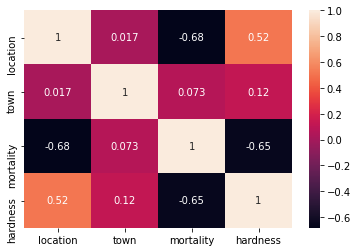

In [11]:
sns.heatmap(df.corr(), annot=True);

Более темные квадраты показывают связь признаков

Например:

hardness и mortality = -0.65
mortality и location = -0.68

В Dataset разбили города на северный и южный, что позволиило установить связь

Коэффициент корреляции имеет отрицательно значение.

Наблюдаем обратную связь двух величин. Связь слобовыражена.

С уменьшением жесткости воды смертность растет.

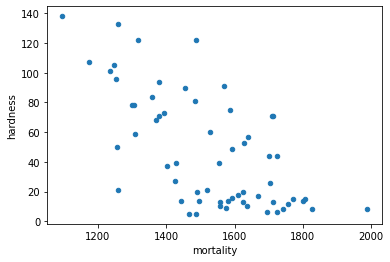

In [41]:
# Строим график изменения жесткости воды от смертности
df.plot(kind='scatter', x='mortality', y='hardness');

In [39]:
def function(X, Y):
    
        """
        Функция считает коэффициент детерминации, выводит график остатков, среднию абсолютную ошибку,
        дисперсию абсолютной ошибки.
    
        """
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
                
        # Обращаемся к классу LinearRegression() и записываем его в переменную model
        model = LinearRegression()
        
        # Тренируем нашу модель 
        model.fit(X_train, y_train)
        
        # Найдем значения а и b для нашей функции y = ax + b

        print('Weights: {}'.format(model.coef_[0]))
        print('Bias: {}'.format(model.intercept_))

        # На основе тестовых значений смертности прогнозируем наши значения жесткости воды
        y_pred = model.predict(X_test)
        
        # Коэффициент детерминации
        R2 = model.score(X_test, y_test)
        print(f'Коэффициент детерминации: {round(R2,3)} ')
        
        # plt.scatter(X_test, y_test)
        # plt.plot(X_test, y_pred, c='r')
        
        # Средняя абсолютная ошибка может быть определена как
        print(f'Cредняя абсолютная ошибка: {round(mean_absolute_error( y_pred, y_test), 3)} ')
        # или
        # np.mean(np.abs(y_pred - y_test))
        
        # Дисперсия абсолютной ошибки (суммарная ошибка предскаазания для всей выборки)
        print(f'Дисперсия абсолютной ошибки: {round(np.var(np.abs(y_test - y_pred.T)), 2)}')      
        
        # График остатков из библиотеки statsmodels
        
        X_const = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_const)
        results = model.fit()
        
        plt.scatter(X_const.iloc[:, 1], results.resid)
        plt.title('Scatter plot Hardness vs. Residuals')
        plt.xlabel('Hardness')
        plt.ylabel('OLS Model Residuals')

Weights: -0.12670201508767137
Bias: 239.3678426140957
Коэффициент детерминации: 0.495 
Cредняя абсолютная ошибка: 22.447 
Дисперсия абсолютной ошибки: 197.07


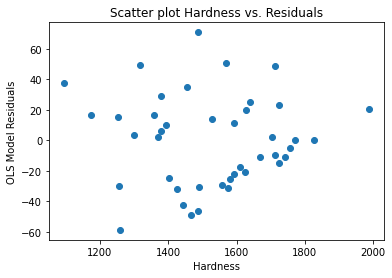

In [40]:
# Для северных и южных городов
function(df[['mortality']], df['hardness'])

Распределение остатков имеет хоатичное распределение. Это говорит хорошем построение модели.

Коэффициент детерминации: 0.495 имеет небольшое значение. «объясняет» слабую зависимость данных.